<a href="https://colab.research.google.com/github/victorhss21/Estudos_CD/blob/main/Algoritimos_Hierarquicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Algoritimos Hierarquicos**

 Neste notebook, iremos tentar responder as seguintes perguntas:
>
> * **O que é?** (Motivação para criação & O que se propõe a resolver)
>
> * **Qual o seu funcionamento?** (Pressupostos & Lógica do algoritimo)
>
> * **Como utiliza-lo?** (Aplicação em python)
>
> * **Quais suas vantagens e limitações?** (Vantagen vs Limitações & Precauções)**
>
> * **Como valiar sua performance?** (Mensuração dos resultados)
>
> * **Quais as principais dicas prática que "mudam o jogo" em situações reais?** (Hacks & Dicas que mudam o jogo)

### **01. O que é?** *(Motivação para criação & O que se propõe a resolver)*

**Overview:**

* É uma classe de **algoritimos de agrupamento** para resolução de problemas *não-supervisionados* que constroem uma **hierarquia de clusters** baseada na similaridade entre os grupos
* Ao contrário do K-Means (e suas variações) que particionam o conjuntos de dados em clusters únicos, sem relação clara entre si e de número pré-defindo, algortimos hierarquicos criam uma **estrutura hierarquica que permitem visualizar diferentes números de clusters em diferentes nível de granularidade**, possibilitando a **escolha do número de cluster posteriormente**
* Como qualquer algoritimo de agrupamento, algoritimos hierarquicos tem por objetivo identificar relações etruturais naturais entre os dados. A principal característica desse algoritimo, é a **"predisposição" para a identificação de estruturas aninhadas** (permitindo e facilitando a identitificaçã do nível de similaridade entre os clusters)

### **02. Qual o seu funcionamento?** *(Pressupostos & Lógica do algoritimo)*

#### Existem **duas abordagens principais** para os algoritimos hierárquicos:

- **Aglomerativos** (Bottom-Up)
  - Cada ponto de dado do conjunto de dados é iniciado como um cluster invidual
  - Utilizando uma métrica de *similaridade* ou *dissimilaridade*, iterativamente é realização a junção de clusters mais similares
  - O proceso chega ao fim, até que todos os pontos de dados, estejam em um único cluster
- **Divisivos** (Top-Down)
  - Todos os pontos de dados iniciam em um único cluster
  - Rescursivamente os clusters existentes vão sendo divididos com base em alguma métrica de *similaridade* ou *dissimilaridade*
  - O proceso chega ao fim, até que todos os pontos de dados, sejam seus próprios clusters

> **Nota 1:** Em ambas as abordagens (aglomerativa e divisiva), a cada iteração, apenas um cluster é "aglutinado" com outro cluster ou "desaglutinado" de seu cluster origem. Evidentemente, está é uma operação computacionalmente dispendiosa

> **Nota 2:** A métrica mais comumente utilizada para mensurar a similaridade entre clusters é a ***dissimilaridade*** (quanto maior a dissimilaridade, mais semelhante são os cluster. Existem várias medidas de dissimilaridades, mas a grande maioria são variações da ideia de ***distância*** (quanto menor a distância, mais similares)







#### Sobre **pressupostos**...

Não há nenhum pressusposto claro sobre algoritimos aglomerativos, a não ser que são algoritimos que utilizam métricas de distância, portanto são sensível a escala do conjuntos de dados (que idealmente deve ser normalizado)


#### **Métricas de Distância (Dissimilaridade):** A escolha da métrica de distância é crucial. As mais comuns incluem:

##### **(A) Distância Euclidiana *(Euclidean Distance)*** Mede a distância em linha reta entre dois pontos no espaço Euclidiano. É a métrica mais intuitiva e amplamente utilizada.
$$d(x, y) = √Σ(xi - yi)²$$

*   **Prós:**
    *   Simples de entender e implementar.
    *   Geometricamente intuitiva e familiar.
    *   Funciona bem quando os dados são contínuos e as diferenças nas magnitudes são importantes.
*   **Contras:**
    *   Altamente sensível a outliers. Um único outlier pode distorcer significativamente as distâncias.
    *   Sensível à escala das variáveis. Se as variáveis tiverem escalas diferentes, a variável com a maior escala dominará a distância. Requer normalização/padronização dos dados.
    *   Não funciona bem em espaços de alta dimensionalidade (Curse of Dimensionality). A concentração de distâncias faz com que a distinção entre pontos se torne menos significativa.
*   **Quando usar:**
    *   Dados contínuos onde a magnitude das diferenças é importante.
    *   Dados normalizados/padronizados para evitar o efeito da escala.
    *   Espaços de baixa e média dimensionalidade.
    *   Quando outliers não são um problema significativo (ou foram tratados).

##### **(B) Distância Manhattan (*Manhattan Distance / City Block Distance*)**: Mede a distância em linha reta entre dois pontos no espaço Euclidiano. É a métrica mais intuitiva e amplamente utilizada.
$$d(x, y) = Σ|xi - yi|$$

*   **Prós:**
    *   Menos sensível a outliers do que a distância Euclidiana, pois não eleva as diferenças ao quadrado.
    *   Funciona bem quando as variáveis não são correlacionadas.
    *   Mais rápida de calcular do que a distância Euclidiana (não requer a operação de raiz quadrada).
*   **Contras:**
    *   Não é tão intuitiva geometricamente quanto a distância Euclidiana.
    *   Não diferencia entre pequenas e grandes diferenças nas coordenadas (trata todas igualmente).
    *   Ainda sensível à escala das variáveis, embora menos que a Euclidiana.
*   **Quando usar:**
    *   Dados com outliers.
    *   Variáveis não correlacionadas.
    *   Espaços de alta dimensionalidade (pode ser melhor que a Euclidiana em alguns casos).
    *   Quando a velocidade de cálculo é uma consideração importante.

##### **(C) Distância de Cosseno (*Cosine Distance*)**: Mede o cosseno do ângulo entre dois vetores. Em vez de medir a magnitude da distância, mede a similaridade direcional.
$$d(x, y) = 1 - \frac{(x · y)}{(||x|| ||y||)}$$

(Onde $x · y$ é o produto escalar e $||x||$ é a norma do vetor $x$)

*   **Prós:**
    *   Robusta à magnitude dos vetores. Apenas a direção importa.
    *   Funciona muito bem com dados esparsos (muitos valores zero).
    *   Ideal para dados textuais (vetores de contagem de palavras) e dados de recomendação (perfis de usuários).
*   **Contras:**
    *   Ignora a magnitude das diferenças. Dois vetores com a mesma direção, mas magnitudes muito diferentes, serão considerados similares.
    *   Não funciona bem quando a magnitude das diferenças é importante.
    *   Pode não ser apropriada para dados com valores negativos.
*   **Quando usar:**
    *   Dados textuais (análise de documentos, mineração de texto).
    *   Sistemas de recomendação (filtragem colaborativa).
    *   Dados esparsos.
    *   Quando a similaridade direcional é mais importante do que a magnitude das diferenças.

##### **(D) Distância de Mahalanobis (*Mahalanobis Distance*)**[$^{[1]}$](https://blog.dailydoseofds.com/p/the-limitation-of-euclidean-distance)[$^{[2]}$](https://www.kaggle.com/discussions/questions-and-answers/354660): Mede a distância entre dois pontos, levando em consideração a correlação entre as variáveis e a escala de cada variável.  É essencialmente uma distância Euclidiana calculada em um espaço transformado, onde as variáveis são não correlacionadas e têm variância unitária.
$$d(x, y) = √((x - y)T S^{-1} (x - y))$$

(Onde $S$ é a matriz de covariância dos dados e $S^{-1}$ é a sua inversa)

*   **Prós:**
    *   Invariante à escala das variáveis.
    *   Leva em consideração a correlação entre as variáveis.
    *   Mais precisa do que a distância Euclidiana quando as variáveis são correlacionadas.
*   **Contras:**
    *   Computacionalmente mais cara do que as outras métricas (requer o cálculo da matriz de covariância inversa).
    *   Requer um tamanho de amostra grande o suficiente para estimar a matriz de covariância de forma confiável.
    *   Se a matriz de covariância for singular (não inversível), a distância não pode ser calculada (pode acontecer se o número de variáveis for maior que o número de amostras).
    *   Assume que os dados seguem uma distribuição normal multivariada.
*   **Quando usar:**
    *   Dados onde as variáveis são correlacionadas e têm escalas diferentes.
    *   Quando se deseja levar em consideração a estrutura de covariância dos dados.
    *   Quando há dados suficientes para estimar a matriz de covariância de forma confiável.

##### **Tabela resumo | Prós vs Contras:**

| Métrica             | Prós                                                         | Contras                                                                | Quando Usar                                                                                                     |
| ------------------- | ------------------------------------------------------------ | ---------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------- |
| Euclidiana          | Simples, intuitiva, fácil de implementar.                    | Sensível a outliers e escala, funciona mal em alta dimensionalidade.   | Dados contínuos, normalizados, baixa dimensionalidade, poucos outliers.                                       |
| Manhattan           | Menos sensível a outliers, rápida de calcular.             | Não intuitiva geometricamente, sensível à escala.                       | Dados com outliers, variáveis não correlacionadas, alta dimensionalidade.                                         |
| Cosseno             | Robusta à magnitude, funciona bem com dados esparsos.      | Ignora a magnitude, não apropriada para valores negativos.               | Dados textuais, sistemas de recomendação, dados esparsos.                                                         |
| Mahalanobis         | Invariante à escala, considera a correlação.                | Computacionalmente cara, requer grande amostra, assume normalidade.   | Dados com variáveis correlacionadas e escalas diferentes, quando a estrutura de covariância é importante.       |


> **Nota 1:** A escolha da métrica de dissimilaridade/distância a ser utilizada é árbitrária. Entretanto, há situações onde, na prática, certas distância demonstram-se mais adequada do que outras (por exemplo: na presença de outliers, a distância euclidiana tende a penalizar cluster potencialmente similares na ausência destes outliers). Em suma, sempre devemos escolher aquele que nos fornece mais insights sobre nossos conjunto de dados.

> **Nota 2:** Antes de usar qualquer métrica de distância, é fundamental **normalizar ou padronizar** os dados para **evitar que variáveis com escalas maiores dominem o cálculo das distâncias**. Técnicas comuns incluem **MinMaxScaler** (escala para um intervalo de 0 a 1) e **StandardScaler** (escala para ter média 0 e desvio padrão 1).


#### **Lógica do algoritmo** (Aglomerativo - *frequentemente mais usado*):

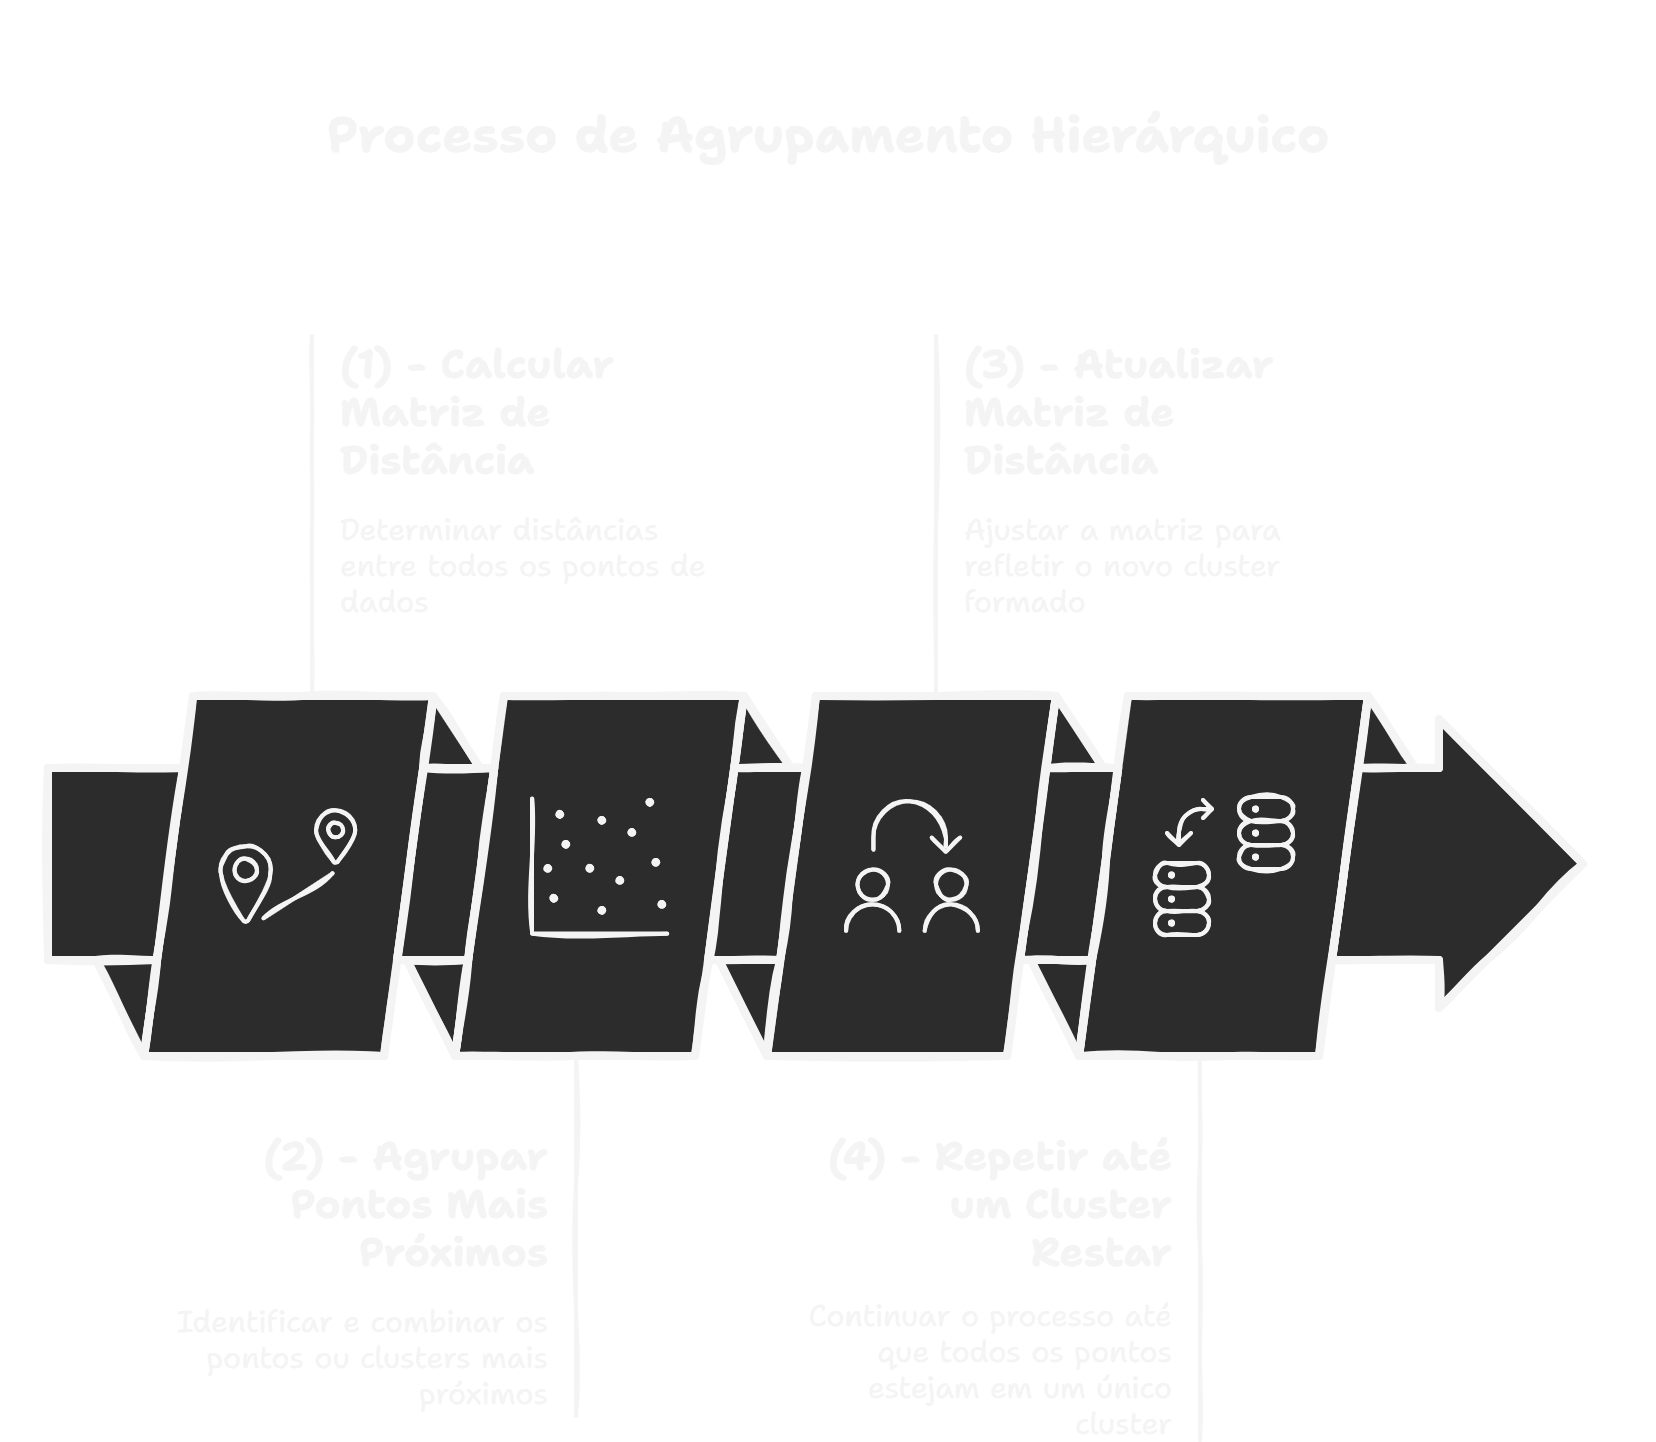

**Descrição:**

  1. Calcular a **matriz de distância/similaridade** entre todos os pontos
  2. **Agrupar** os dois pontos/clusters **mais próximos**
  3. **Atualizar a matriz de distância** considerando o novo cluster formado
  4. **Repetir os passos 2 e 3** até que reste apenas um cluster


#### **Métricas de ligação** (linkage) comuns:

- Na abordagem aglomerativa, após a formação dos primeiros clusters compostos por mais de um ponto de dado, se faz necessário definir a **abordagem de como medir a distância/disimilaridade entre os clusters**. Existem várias, mas as **4 principais** são:

  - **Single-linkage:** distância entre os **pontos mais próximos** de dois clusters
  - **Complete-linkage:** distância entre os **pontos mais distantes** de dois clusters
  - **Average-linkage:** média das distâncias entre todos os pares de pontos inter-cluster
  - **Ward:** minimiza a variância total dentro de cada cluster (intra-cluster)

> **Nota 1:** A abordagem **Ward** realiza a união de 2 clusters tendo como objetivo minimizar a variação intra-cluster após a únião dos 2 clusters. Ou seja, busca minimizar a distância de cada ponto de dados que irá compor o novo cluster para o novo centróide. Computacionalmente, tem um custo considerável pois esse cálculo é feito para as N possibilidades de junção entre 2 clusters.

> **Nota 2:** Ainda sobre a abordagem **Ward**. Possui a tendência em formar grupos *hiper-esféricos*. Isso quer dizer que, em um espaço 3D (3 features), os clusters formados tende a ter uma "área" esférica devido a minimização da variância intra-cluster, que no limite, irá assumir um formato mais compacto: esférico. O termo *hiper-esféricos* é eplicado aqui, pois é uma generalização para o caso de um espaço N-dimensional (N features)... Ainda assim, tente a ter resultado melhores do que os demais métodos

### **03. Como utiliza-lo?** *(Aplicação em python)*

#### (A) Importando bibliotecas

In [1]:
# Importando as bibliotecas necessárias
import numpy as np                                        # Biblioteca para operações numéricas e manipulação de arrays
import pandas as pd                                       # Biblioteca para manipulação e análise de dados tabulares
import matplotlib.pyplot as plt                           # Biblioteca para visualização de dados
from scipy.cluster.hierarchy import dendrogram, linkage   # Funções específicas para clusterização hierárquica
from sklearn.cluster import AgglomerativeClustering       # Implementação do algoritmo de clusterização aglomerativa
from sklearn.datasets import make_blobs                   # Função para gerar dados sintéticos com clusters
from sklearn.preprocessing import StandardScaler          # Para padronização dos dados
from sklearn.metrics import silhouette_score              # Métrica para avaliar a qualidade dos clusters
import scipy.cluster.hierarchy as sch                     # Funções para clusterização hierárquica
from sklearn.impute import SimpleImputer                  # Imputação de valores faltantes

#### (B) Carregando conjunto de dados

In [2]:
# Carregar e preparar os dados
# Vamos usar um dataset de exemplo sobre vinho (Wine Quality Dataset)
# Disponível no UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/wine+quality
# Assume-se que o arquivo 'winequality-white.csv' está na mesma pasta
try:
    data = pd.read_csv('winequality-white.csv', sep=',')
except FileNotFoundError:
    print("Arquivo 'winequality-white.csv' não encontrado. Certifique-se de que ele está no diretório correto.")
    exit()

In [3]:
# Visualizando primeiros registros e infos do dataframe
print('Amostra do conjunto de dados:\n')
display(data.head())
print('\nInformações do conjunto de dados:\n')
display(data.info())

Amostra do conjunto de dados:



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6



Informações do conjunto de dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


None

#### (C) Pré-processamento dos dados

In [4]:
# Imputar valores faltantes (se houver) utilizando a média
imputer = SimpleImputer(strategy='mean')  # Usa a média para preencher os valores faltantes
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Selecionar features para clusterização (ex: acidez fixa, acidez volátil, densidade, álcool)
features = ['fixed acidity', 'volatile acidity', 'density', 'alcohol']
X = data_imputed[features].values

# Padronizar os dados utilizando StandardScaler (é crucial normalizar os dados pois as features possuem escalas distintas e estamos lidando com algoritimo que utiliza distância)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### (D) Análise utilizando Dendograma

> Antes de realizar a análise do dedograma em si, é extretamente importante especificar qual o método de linkage a ser utilizado, bem como a métriza de dissimilaridade.
>
> Ambas determiam diretamente o resultado do agrupamento final

In [5]:
# Especificar o método de linkage e métrica de dissimilaridade

# Método de Linkage: 'ward' (minimiza a variância dentro dos clusters)
linkage_method = 'ward'
# Métrica de Dissimilaridade: 'euclidean' (distância euclidiana)
dissimilarity_metric = 'euclidean'

In [6]:
# Calcular a matriz de dissimilaridade usando o método de linkage especificado
linked = sch.linkage(X_scaled, method=linkage_method, metric=dissimilarity_metric)

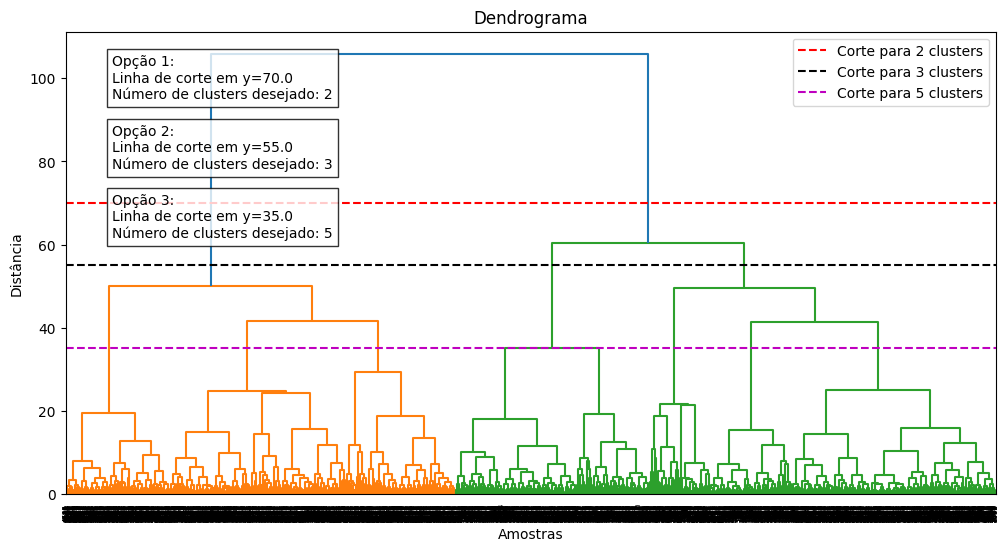

In [69]:
# Plotar o dendrograma
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linked,
                             orientation='top',
                             distance_sort='ascending',
                             show_leaf_counts=True)  # Exibe o número de amostras em cada nó

#############################################################################################
# Especifica altura e num. clusters de acordo com o corte
#############################################################################################

# Número desejado de clusters e altura do corte (ajuste com base na inspeção visual)
n_clusters_desejado_1 = 2   # Exemplo: Vamos supor que queremos 3 clusters
altura_corte_1 = 70         # Ajuste este valor com base na inspeção visual do seu dendrograma

# Número desejado de clusters e altura do corte (ajuste com base na inspeção visual)
n_clusters_desejado_2 = 3   # Exemplo: Vamos supor que queremos 3 clusters
altura_corte_2 = 55         # Ajuste este valor com base na inspeção visual do seu dendrograma

# Número desejado de clusters e altura do corte (ajuste com base na inspeção visual)
n_clusters_desejado_3 = 5   # Exemplo: Vamos supor que queremos 3 clusters
altura_corte_3 = 35         # Ajuste este valor com base na inspeção visual do seu dendrograma

#############################################################################################
# Adiciona linha de corte
#############################################################################################

# Adicionar a linha horizontal tracejada para indicar o corte
plt.axhline(y=altura_corte_1, color='r', linestyle='--', label=f'Corte para {n_clusters_desejado_1} clusters')

# Adicionar a linha horizontal tracejada para indicar o corte
plt.axhline(y=altura_corte_2, color='k', linestyle='--', label=f'Corte para {n_clusters_desejado_2} clusters')

# Adicionar a linha horizontal tracejada para indicar o corte
plt.axhline(y=altura_corte_3, color='m', linestyle='--', label=f'Corte para {n_clusters_desejado_3} clusters')

# Adicionar a caixa de texto explicativa
plt.text(0.05, 0.95,                                  # Posição da caixa de texto (x=5%, y=95% do plot)
         f'Opção 1:\n'
         f'Linha de corte em y={altura_corte_1:.1f}\n'
         f'Número de clusters desejado: {n_clusters_desejado_1}',
         transform=plt.gca().transAxes,               # Usar coordenadas dos eixos
         fontsize=10,
         verticalalignment='top',                     # Alinhar o texto ao topo
         bbox=dict(facecolor='white', alpha=0.8))     # Adicionar um fundo branco transparente

# Adicionar a caixa de texto explicativa
plt.text(0.05, 0.80,                                  # Posição da caixa de texto (x=5%, y=95% do plot)
         f'Opção 2:\n'
         f'Linha de corte em y={altura_corte_2:.1f}\n'
         f'Número de clusters desejado: {n_clusters_desejado_2}',
         transform=plt.gca().transAxes,               # Usar coordenadas dos eixos
         fontsize=10,
         verticalalignment='top',                     # Alinhar o texto ao topo
         bbox=dict(facecolor='white', alpha=0.8))     # Adicionar um fundo branco transparente

# Adicionar a caixa de texto explicativa
plt.text(0.05, 0.65,                                  # Posição da caixa de texto (x=5%, y=95% do plot)
         f'Opção 3:\n'
         f'Linha de corte em y={altura_corte_3:.1f}\n'
         f'Número de clusters desejado: {n_clusters_desejado_3}',
         transform=plt.gca().transAxes,               # Usar coordenadas dos eixos
         fontsize=10,
         verticalalignment='top',                     # Alinhar o texto ao topo
         bbox=dict(facecolor='white', alpha=0.8))     # Adicionar um fundo branco transparente

plt.title('Dendrograma')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.legend() # Exibe a legenda
plt.show()

> Ao analisar o dendograma, observamos que existem dois "*cortes horizontais*" que poderiam ser feitos e nos fornecer um número de cluster minimamente satisfotórios:
* **Opção 1:** Na distância igual a 70, onde teríamos 2 clusters
* **Opção 2:** Na distância igual a 45, onde teríamos 3 clusters
* **Opção 3:** Na distância igual a 35, onde teríamos 5 clusters
>
> Dado a necessidade de escolha, seguiremos com $k = 3$ pois é um número mínimo de cluster que parece trazer alguma detecção de padrão (além de 2 grupos, que pode acabar sendo até mais útil da perspectiva de negócios) e não é um número tão grande que inviabilize a análise dos grupos

#### (E) Aplicação da clusterização

Após a análise de Dendograma e definição do número de cluster a qual deseja-se seguir, iremos utilizar a biiblioteca *Scikit Learn* para criar o algortimo de clusterização e realiza-la:

In [45]:
# Define o Número de clusters desejados
n_clusters_desejado = 3

In [46]:
# Relembrando o método de linkage e metríca de dissimilaridades escolhidas
print(f'Método de linkage escolhido: {linkage_method}')
print(f'Métrica de dissimilaridade escolhida: {dissimilarity_metric}')

Método de linkage escolhido: ward
Métrica de dissimilaridade escolhida: euclidean


In [47]:
# Criar o modelo AgglomerativeClustering com o número de clusters definido
hc = AgglomerativeClustering(n_clusters=n_clusters_desejado, metric=dissimilarity_metric, linkage=linkage_method)

In [48]:
# Ajustar o modelo aos dados e aplicar a luctserização (note que precisamos usar `fit_predict()`)
y_hc = hc.fit_predict(X_scaled)

# Adicionar os labels dos clusters ao DataFrame original
data_imputed['cluster'] = y_hc

In [49]:
# Imprime dataframe com resultado final
data_imputed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,2


#### (F) Validação dos resultados

Como estamos lidando com um problema não-supervisionado, não temos como avaliar a precisão da clusterização feita, mas podemos utilizar de métricas que mensuram a coerência do agrupamento feito. Algumas delas são:

##### **Silhouette Score *(Coeficiente de Silhueta)*:** Mede quão bem uma amostra se encaixa em seu próprio cluster em comparação com outros clusters. É calculado para cada amostra individualmente e, em seguida, calcula-se a média de todos os valores para obter o Silhouette Score geral.
$$s = \frac{(b - a)}{max(a, b)}$$

Onde:

- $a$ é a distância média intra-cluster (distância média da amostra a todos os outros pontos no mesmo cluster);

- $b$ é a distância média do vizinho mais próximo (distância média da amostra a todos os pontos no cluster mais próximo ao qual ela não pertence).

*   **Intervalo de Valores:** -1 a 1

    *   Próximo de 1: A amostra está bem agrupada e longe de outros clusters.
    *   Próximo de 0: A amostra está perto da fronteira de decisão entre dois clusters.
    *   Próximo de -1: A amostra pode ter sido atribuída ao cluster errado.

*   **Prós:**

    *   Fácil de entender e interpretar.
    *   Fornece insights sobre a qualidade da clusterização para cada amostra individualmente.
    *   Não requer conhecimento prévio sobre as "ground truth" (verdadeiras etiquetas) dos dados.
    *   Pode ser usado para comparar diferentes algoritmos de clusterização e diferentes números de clusters.

*   **Contras:**

    *   Assume que os clusters são [convexos](https://en.wikipedia.org/wiki/Convex_set)¹
    *   Pode ser sensível à escolha da métrica de distância.
    *   Pode ser computacionalmente caro para grandes conjuntos de dados.
    *   Pode favorecer clusters densos e esféricos.

*   **Quando usar:**

    *   Para avaliar a qualidade geral da clusterização.
    *   Para comparar diferentes algoritmos de clusterização ou diferentes números de clusters.
    *   Quando não há "ground truth" disponível.
    *   Para identificar amostras mal classificadas.
    *   Em datasets com clusters relativamente bem separados e convexos.

¹*conjunto de dados cujo todos os pontos podem ser "ligados" por uma reta imaginária que passa internamente pelo corpo geométrico formado pelo conjunto. Ex: Esfera = convexo; Rosquinha = não convexo; Cubo = convexo; Polígono côncavo = não convexo.*

##### **Davies-Bouldin Index *(Índice de Davies-Bouldin)*:** Mede a similaridade média entre cada cluster e seu cluster mais similar (o cluster mais próximo). Leva em consideração tanto a distância intra-cluster quanto a distância inter-cluster. Quanto menor o índice, melhor a clusterização.
$$DB = \frac{1}{k} ⋅ ∑ max \left ( \frac{s_i + s_j}{d(c_i, c_j)} \right )$$

Onde:

*   $k$ é o número de clusters.
*   $s_i$ é a dispersão média dentro do cluster $i$.
*   $d(c_i, c_j)$ é a distância entre os centróides dos clusters $i$ e $j$.

*   **Intervalo de Valores:** 0 a ∞ (Quanto menor, melhor)

*   **Prós:**

    *   Intuitivo: Penaliza clusters que são muito dispersos ou muito próximos uns dos outros.
    *   Relativamente rápido de calcular.
    *   Não requer "ground truth".

*   **Contras:**

    *   Assume que os clusters são convexos e isotrópicos (esféricos)².
    *   Sensível à escolha da métrica de distância.
    *   Pode não funcionar bem com clusters de densidades muito diferentes.
    *   Pode ser difícil de interpretar para grandes conjuntos de dados com muitos clusters.

*   **Quando usar:**

    *   Para comparar diferentes algoritmos de clusterização ou diferentes números de clusters.
    *   Quando não há "ground truth" disponível.
    *   Em datasets com clusters relativamente bem separados e convexos.
    *   Quando a velocidade de cálculo é uma consideração importante.

²Significa que as propriedades são as mesmas em todas as direções. **A variância dos pontos dentro do cluster é aproximadamente a mesma em todas as direções**, isto é, não há uma direção preferencial ao longo da qual os pontos se estendem. **Em resumo, são clusters que têm uma forma aproximadamente esférica ou circular (em 2D) ou uma forma esférica em dimensões superiores**.
O oposto de isotrópico seria um **cluster anisotrópico, que tem uma forma alongada, elíptica ou irregular**. Nesses clusters, a variância dos pontos é diferente em diferentes direções.

##### **Calinski-Harabasz Index *(Índice de Calinski-Harabasz / Variance Ratio Criterion)*:** Mede a razão entre a variância entre os clusters e a variância dentro dos clusters. Quanto maior o índice, melhor a clusterização. Uma pontuação alta significa que os clusters são densos e bem separados.

$$CH = \frac{SS_B / (k - 1)}{SS_W / (n - k)}$$

Onde:

*   $SS_B$ é a soma dos quadrados entre os clusters (variância entre os clusters).
*   $SS_W$ é a soma dos quadrados dentro dos clusters (variância dentro dos clusters).
*   $k$ é o número de clusters.
*   $n$ é o número total de amostras.

*   **Intervalo de Valores:** 0 a ∞ (Quanto maior, melhor)

*   **Prós:**

    *   Relativamente rápido de calcular.
    *   Intuitivo: Maximiza a separação entre os clusters e minimiza a dispersão dentro dos clusters.
    *   Não requer "ground truth".
    *   Geralmente funciona bem para diferentes formas de clusters.

*   **Contras:**

    *   Pode favorecer clusterizações com um número maior de clusters.
    *   Não é tão intuitivo quanto o Silhouette Score ou o Davies-Bouldin Index.
    *   Sensível à escala dos dados.

*   **Quando usar:**

    *   Para comparar diferentes algoritmos de clusterização ou diferentes números de clusters.
    *   Quando não há "ground truth" disponível.
    *   Quando se deseja maximizar a separação entre os clusters e minimizar a dispersão dentro dos clusters.

##### **Elbow Method *(Método do Cotovelo)**:** Não é uma métrica de avaliação direta, mas sim uma técnica visual para determinar o número ideal de clusters. Consiste em plotar a soma dos quadrados intra-cluster (WCSS - Within-Cluster Sum of Squares) em função do número de clusters e procurar por um "cotovelo" no gráfico. O ponto de cotovelo é o número de clusters onde adicionar mais clusters traz pouco ganho em termos de redução do WCSS.

$$WCSS = Σ Σ ||x_i - c_k||²$$

Onde:

*   $x_i$ é uma amostra no cluster $k$.
*   $c_k$ é o centróide do cluster $k$.

*   **Prós:**

    *   Simples de entender e implementar.
    *   Visualmente intuitivo.

*   **Contras:**

    *   Subjetivo: A identificação do "cotovelo" pode ser ambígua em alguns casos.
    *   Nem sempre produz um cotovelo claro.
    *   Pode ser computacionalmente caro para grandes conjuntos de dados.
    *   Mais adequado para algoritmos como K-Means que minimizam o WCSS diretamente.

*   **Quando usar:**

    *   Para obter uma estimativa inicial do número ideal de clusters.
    *   Combinado com outras métricas de avaliação para confirmar os resultados.
    *   Principalmente para algoritmos como K-Means, mas pode ser adaptado para outros algoritmos de clusterização.


##### **Tabela resumo | Prós vs Contras:**

| Métrica/Método        | Prós                                                             | Contras                                                                  | Quando Usar                                                                                                                                    |
| ---------------------- | ---------------------------------------------------------------- | ------------------------------------------------------------------------ | ---------------------------------------------------------------------------------------------------------------------------------------------- |
| Silhouette Score       | Intuitivo, fornece insights por amostra, não requer "ground truth". | Assume clusters convexos, sensível à métrica de distância, computacionalmente caro. | Avaliação geral, comparação de algoritmos, identificação de amostras mal classificadas, datasets com clusters bem separados e convexos.     |
| Davies-Bouldin Index | Intuitivo, rápido, não requer "ground truth".                   | Assume clusters convexos e isotrópicos, sensível à métrica de distância.       | Comparação de algoritmos, datasets com clusters bem separados e convexos, quando a velocidade de cálculo é importante.                           |
| Calinski-Harabasz Index | Rápido, maximiza a separação e minimiza a dispersão, não requer "ground truth". | Pode favorecer mais clusters, não tão intuitivo, sensível à escala.             | Comparação de algoritmos, quando se deseja maximizar a separação entre os clusters e minimizar a dispersão dentro dos clusters.                 |
| Elbow Method          | Simples, visualmente intuitivo.                                  | Subjetivo, nem sempre produz um cotovelo claro, computacionalmente caro.  | Estimativa inicial do número de clusters, combinado com outras métricas, principalmente para algoritmos como K-Means.                              |


> **Nota 1:** A escolha da métrica de avaliação mais apropriada depende do contexto específico do problema, das características dos dados e dos objetivos da análise.

> **Nota 2:** É sempre recomendável usar múltiplas métricas de avaliação para obter uma visão mais completa e robusta da qualidade da clusterização.

##### (F.1) Silhouette Score:

In [50]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

-----------------------------------------------
      Silhouette Score Médio:  0.19
-----------------------------------------------



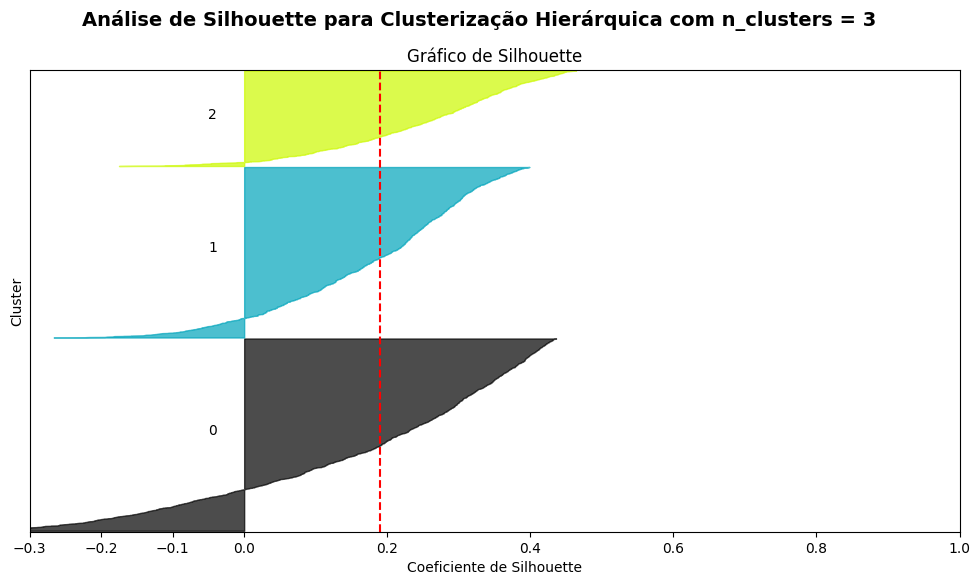

In [62]:
# 6. Validação dos resultados:
# Utilizar o método da silhueta para avaliar a qualidade da clusterização

silhouette_avg = silhouette_score(X_scaled, y_hc)
print(f"-----------------------------------------------")
print(f"      Silhouette Score Médio: {silhouette_avg: .2f}")
print(f"-----------------------------------------------\n")

# Calcular o Silhouette Score para cada amostra
silhouette_values = silhouette_samples(X_scaled, y_hc)

# Plotar o gráfico de Silhouette
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(12, 6)

# Configurar os limites do gráfico
ax1.set_xlim([-0.1, 1])  # O Silhouette Score varia de -1 a 1
ax1.set_ylim([0, len(X_scaled) + (n_clusters_desejado + 1) * 10])  # Espaço para os clusters

y_lower = 10
for i in range(n_clusters_desejado):
    # Agrupar os Silhouette Scores para o cluster i e ordená-los
    ith_cluster_silhouette_values = silhouette_values[y_hc == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters_desejado)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("Gráfico de Silhouette")
ax1.set_xlabel("Coeficiente de Silhouette")
ax1.set_ylabel("Cluster")

# The vertical line for the average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.3,-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.suptitle(("Análise de Silhouette para Clusterização Hierárquica com n_clusters = %d" % n_clusters_desejado),
             fontsize=14, fontweight='bold')

plt.show()

-----------------------------------------------
      Silhouette Score por Qtd. Clusters
-----------------------------------------------

Número de clusters = 2, Silhouette Score =  0.27
Número de clusters = 3, Silhouette Score =  0.19
Número de clusters = 4, Silhouette Score =  0.15
Número de clusters = 5, Silhouette Score =  0.16
Número de clusters = 6, Silhouette Score =  0.16
Número de clusters = 7, Silhouette Score =  0.16
Número de clusters = 8, Silhouette Score =  0.16
Número de clusters = 9, Silhouette Score =  0.17
Número de clusters = 10, Silhouette Score =  0.15




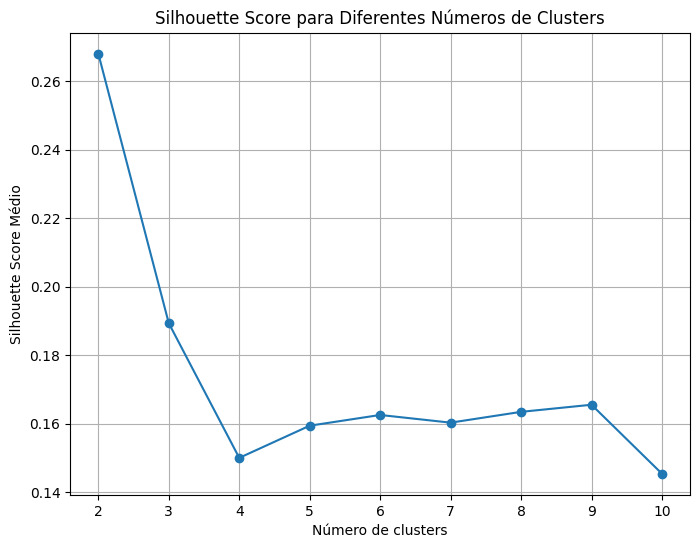


-----------------------------------------------
Número Ótimo de Clusters (maior Silhouette Score): 2
-----------------------------------------------


In [66]:
# 5. Criar Gráfico de Silhouette para diferentes números de clusters
range_n_clusters = range(2, 11)  # Testar de 2 a 10 clusters
silhouette_scores = []

print(f"-----------------------------------------------")
print(f"      Silhouette Score por Qtd. Clusters")
print(f"-----------------------------------------------\n")

for n_clusters in range_n_clusters:
    # Criar o modelo AgglomerativeClustering com o número de clusters definido
    hc = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)

    # Ajustar o modelo aos dados e obter os labels dos clusters
    y_hc = hc.fit_predict(X_scaled)

    # Calcular o Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, y_hc)
    silhouette_scores.append(silhouette_avg)

    print(f"Número de clusters = {n_clusters}, Silhouette Score = {silhouette_avg: .2f}") #Imprime o score de cada cluster
print('\n')

# Plotar o gráfico de Silhouette
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Número de clusters")
plt.ylabel("Silhouette Score Médio")
plt.title("Silhouette Score para Diferentes Números de Clusters")
plt.xticks(range_n_clusters)  # Garante que todos os valores de n_clusters sejam mostrados no eixo x
plt.grid(True)
plt.show()


# Adicionar os labels dos clusters ao DataFrame original (com o melhor número de clusters)
# Após analisar o gráfico, escolha o número de clusters com o maior Silhouette Score
best_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]  # Encontra o número de clusters com o maior Silhouette Score
print(f"\n-----------------------------------------------")
print(f"Número Ótimo de Clusters (maior Silhouette Score): {best_n_clusters}")
print(f"-----------------------------------------------")

hc_best = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=linkage_method)
y_hc_best = hc_best.fit_predict(X_scaled)
data_imputed['cluster'] = y_hc_best

> **Interpretação do gráfico de silhueta:**
>
> Conceitos:
  - Cada cluster é representado por um bloco. O **comprimento (vertical)** indica a **quantidade de pontos de dados pertencentes ao cluster**. Já a **largura do bloco (horizontal)** indica o **coeficiente de silhueta de cada ponto de dado** pertencente ao cluster
    - Note que cada bloco é composto por linhas que indicam o coeficiente de silhueta invidual de cada amostra, por isso eles possuem a borda "granulada"
  - A **linha vertical vermelha**, indica a **média do coeficiente de silhueta de todos os pontos de dados** (de todos os clusters), indicando de forma geral a **qualidade do agrupamento** (mais próximo de 1: muito bom! | mais próximo de -1: muito ruim!)
    - Note que a média é uma métrica influênciada por outliers, isto é, se tiverem algumas amostras dentros do cluster que estão mal alocados (com coef. silhueta negativos ou muito altos) a méria será influencia. Importante ter ateção a isso.
  -  **Clusters bem definidos** possuem blocos com a maioria das amostras com **coeficiente de silhueta positivos**
  - **Clusters mal definidos** possuem blocos com a maioria das amostras com **coeficiente de silhueta negativos**
  - No caso de **coef. silhuetas negativos**, significa que as respectivas **amostras estão mais alocadas**, portanto sendo um indcativo de que o número de clusters não é o ideal
>
> Insights:
>
> - A quantidade de amostras alocadas em cada cluster parece equilibrada, indicando grupos com quantidade semelhantes de amostras. Pode ser um indício de uma boa generalização (porém não podemos ter certeza, dado que a proporção real de amostras pertecentes a cada cluster é desconhecida)
- O coef. silhueta de todos os cluster possuem uma taxa de queda forte, chegando a ficarem negativas - especialmente o cluster 0. Iso indica oportunidade na definição do número de clusters
- A quantidade de amostras com coef. negativo é maior no cluster 0. Poderíamos explorar mais em detalhes essas amostras e suas caracrterísticas a fim de verificar o quão diferentes são das amostras de seus cluster (quem sabe não forma um novo, dado que não é uma quantidade despresível de amostra)

##### Da mesma forma, é crucial realizar uma análise descritiva dos cluster formados a afim de identificar incoerências e atestar a qualidade do agrupamento realizado. Algumas das análises que podem ser feitas:
- Medidas de tendências central e dispersão das features por cluster
- Gráficos de Radar por cluster
- Gráficos de "ranges paralelos"
- Gráficos de box-plot por cluster
- Gráfico de dispersão 3D utilizando as 3 feature mais explicativas

## Referências:

* [Aprendizado de Máquina - Agrupamento de dados: agrupamento hierárquico](https://youtu.be/qm5ua9cdros)
*[Agrupamento hierárquico](https://www.youtube.com/watch?v=zXtMvcgl594&pp=ygUbY2x1c3Rlcml6YcOnw6NvIGhpZXJhcnF1aWNh)
* [StatQuest: Hierarchical Clustering](https://youtu.be/7xHsRkOdVwo)
* [Cluster Analysis](https://julius.ai/glossary/cluster-analysis?utm_term=&utm_campaign=Pmax+for+Sign+Ups&utm_source=adwords&utm_medium=ppc&hsa_acc=6895452537&hsa_cam=20619172441&hsa_grp=&hsa_ad=&hsa_src=x&hsa_tgt=&hsa_kw=&hsa_mt=&hsa_net=adwords&hsa_ver=3&gad_source=2&gclid=Cj0KCQjw16O_BhDNARIsAC3i2GBYYiQL9q7Clhj-qjsoYClXRR3IIPikCbKkK6eXaGcA85wO_ew5yAsaAqtkEALw_wcB)

## Apêndices:

### **Como analisar um dendograma?**

#### **O que é um dendrograma?**  
Um **dendrograma** é um gráfico em forma de árvore que representa a forma como os clusters são formados em um processo de clusterização hierárquica. Ele mostra visualmente em que ordem e a que distância os pontos (ou grupos de pontos) foram unidos.  


#### **Passos para analisar um dendrograma**  

##### **1. Observar a altura dos ramos**  
- No eixo vertical do dendrograma, temos a **distância de ligação** (ou dissimilaridade) entre os clusters.  
- Quando dois clusters se unem, a altura do ponto de fusão indica o quão similares eles são.  
- Quanto maior a altura de fusão, mais diferentes os clusters eram antes de serem unidos.  

> **Dica**: Se dois pontos se unem a uma altura muito baixa, significa que eles são muito similares. Se se unem a uma altura muito alta, significa que são bem diferentes.  


##### **2. Identificar o número ideal de clusters**  
Para determinar um número adequado de clusters, siga estas estratégias:  

- **Método do corte horizontal**:  
  - Imagine que você traça uma linha horizontal em um certo nível da árvore.  
  - O número de segmentos verticais cortados pela linha indica a quantidade de clusters.  

- **Procurar por grandes “saltos” na altura**:  
  - Se houver um grande aumento na altura dos ramos, isso indica que a fusão nesse ponto juntou grupos muito distintos.  
  - Um corte abaixo desse ponto pode ser um bom local para definir os clusters.  

> **Dica**: Geralmente, o melhor ponto para cortar é **antes de um grande salto na altura das fusões**.  


##### **3. Interpretar a relação entre os dados**  
- Grupos que se unem cedo no dendrograma são mais homogêneos (parecidos entre si).  
- Grupos que se unem mais tarde (em maior altura) são mais heterogêneos.  
- A estrutura do dendrograma pode revelar padrões, como grupos bem definidos ou dados mais dispersos.  


#### **Exemplo Prático**  
Considere o seguinte dendrograma:  

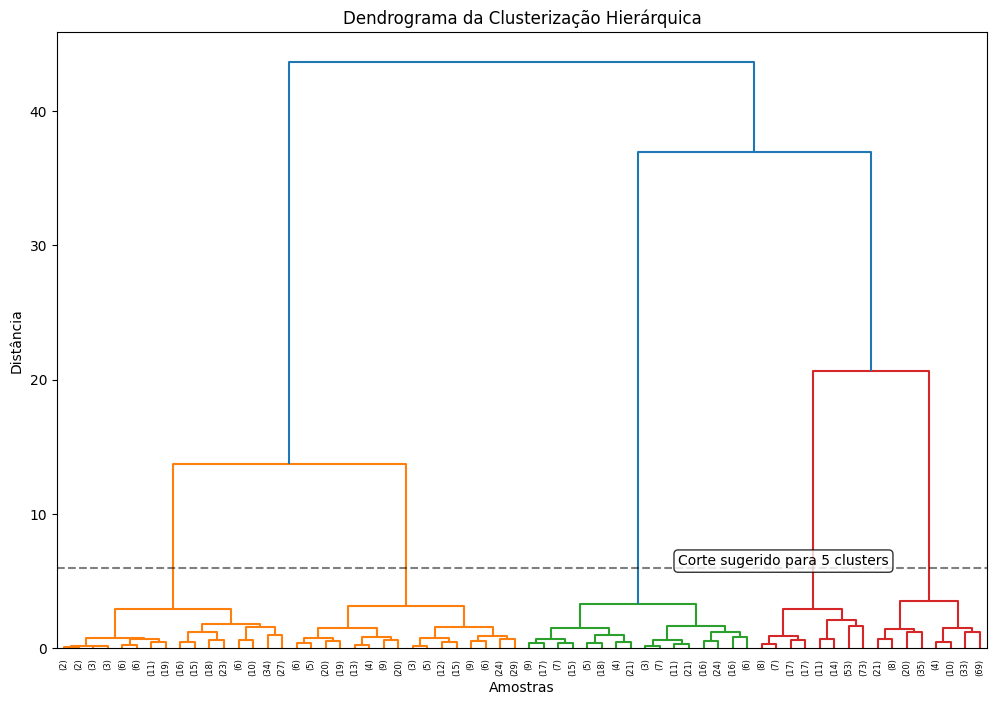

Se ***cortarmos* o dendograma horizontalmente** (transversal ao eixo que mede as distâncias) a partir do momento onde as **distância para forma novos clusters fica *grande o suficiente***, veremos que ocorre a interção em 5 pontos distintos. Dessa forma, poderíamos escolher o número de 5 clusters para agrupar os pontos de dados.


#### **Conclusão**  
- O dendrograma permite visualizar a formação dos clusters e escolher o número ideal de grupos.  
- A altura das fusões indica o nível de similaridade entre os pontos.  
- A decisão de quantos clusters formar depende da análise visual dos padrões do dendrograma.  